# **Persian Recognization**

## **Dataset Prepration**: Persian Numbers and Letters

In [ ]:
import os
import shutil
import re
import random
from keras.utils.image_utils import img_to_array
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
'''
# Introducing path of row data
image_path = "/content/drive/MyDrive/Colab Notebooks/ComputerVision/Digit_Classification/Persian/alpha"
'''

In [ ]:
class_names = ['alef', 'b', 'p', 't', 'se', 'jim', 'che', 'h', 'kh', 'd', 'zal', 'r', 'z', 'zh', 'sin', 'shin', 'sad', 'zad', 't-long', 'z-long', 'ayin', 'ghyin', 'f', 'ghe', 'k', 'g', 'le', 'm', 'n', 'v', 'he', 'ye', 'zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'anewfive']
num_classes = len(class_names)
num_classes

43

In [ ]:
# Creating path of dataset
dataset_path = "/content/drive/MyDrive/Colab Notebooks/ComputerVision/Digit_Classification/Persian/dataset"
if not os.path.exists(dataset_path):
  os.makedirs(dataset_path)

In [ ]:
'''
# Tranfering row data to dataset
for folder_name in os.listdir(image_path):
  folder_path = os.path.join(image_path, folder_name)

  if os.path.isdir(folder_path):
    # check each file is folder or not
    for file_name in os.listdir(folder_path):
      file_path = os.path.join(folder_path, file_name)
      # copy each file to destination
      shutil.copy(file_path, dataset_path)
'''

In [ ]:
# Spliting dataset into train, validation, and test sets randomly

img_train = []
label_train = []
img_val = []
label_val = []
img_test = []
label_test = []

pattern = re.compile("[A-Za-z]+")

for image_name in os.listdir(dataset_path):
  img_path = os.path.join(dataset_path, image_name)
  # image = load_img(img_path, color_mode="rgb", target_size=(100,100), keep_aspect_ratio=True)
  image = cv2.imread(img_path)
  
  image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  _ , threshold = cv2.threshold(image_gray, 3,255, cv2.THRESH_BINARY_INV, cv2.THRESH_OTSU)
  contours , _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  # # Sorting contours from left
  contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)
  x,y,w,h = cv2.boundingRect(contours[0])
  image = threshold[y-12:y+h+12,x-7:x+w+7]
  image = img_to_array(image)
  image = cv2.resize(image, (100,100))
  # image = image.reshape(100,100)
  # cv2_imshow(image)
  # print(image.shape)
  # break
  if random.random() <= 0.75:
    lb_train = pattern.findall(image_name[:-4])
    label_train.append(lb_train[0])
    img_train.append(image)

  elif random.random() >= 0.95:
    lb_test = pattern.findall(image_name[:-4])
    label_test.append(lb_test[0])
    img_test.append(image)

  else:
    lb_val = pattern.findall(image_name[:-4])
    label_val.append(lb_val[0])
    img_val.append(image)

print("training_image= ", len(img_train),", training_label= ", len(label_train),"\n" 
      "validation_image= ",len(img_val), ", validation_label= ",len(label_val),"\n"
      "test_image= ",len(img_test), ", test_label= ",len(label_test))

training_image=  3260 , training_label=  3260 
validation_image=  981 , validation_label=  981 
test_image=  58 , test_label=  58


In [ ]:
# Converting to array
train_image = np.array(img_train)
train_label = np.array(label_train)
val_image = np.array(img_val)
val_label = np.array(label_val)
test_image = np.array(img_test)
test_label = np.array(label_test)

print(test_image.shape)
print(test_label.shape)

(58, 100, 100)
(58,)


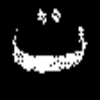

t


In [ ]:
# plt.imshow(test_image[1], cmap="gray")
cv2_imshow(train_image[225])
print(train_label[225])

## **Building CNN model**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder
from keras.callbacks import EarlyStopping

### Data Preprocessing

In [ ]:
# X: Normalization and float making

trainimage = train_image/255.0
testimage = test_image/255.0
valimage = val_image/255.0

In [ ]:
# y: Catorical Target
encoder = OneHotEncoder()
fitencoder= encoder.fit(np.array(class_names).reshape(-1,1))
trainlabel = fitencoder.transform(np.array(train_label).reshape(-1,1)).toarray()
testlabel = fitencoder.transform(np.array(test_label).reshape(-1,1)).toarray()
vallabel = fitencoder.transform(np.array(val_label).reshape(-1,1)).toarray()

In [ ]:
print(trainlabel.shape)
print(vallabel.shape)
print(testlabel.shape)
print(testlabel[0])
print(label_test[0])
print(label_val[0])
print(vallabel[0])

(3260, 43)
(981, 43)
(58, 43)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
jim
jim
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# model = keras.models.Sequential([
#     keras.layers.Reshape([100,100,1], input_shape=(100,100)),
#     keras.layers.Conv2D(filters=16, kernel_size=5, activation="tanh"),          
#     keras.layers.MaxPooling2D(pool_size=2),                                     
#     keras.layers.Conv2D(filters=32, kernel_size=3, activation="tanh"),          
#     keras.layers.MaxPooling2D(pool_size=2),
#     keras.layers.Conv2D(filters=128, kernel_size=3, activation="tanh"), 
#     keras.layers.MaxPooling2D(pool_size=2),
#     keras.layers.Conv2D(filters=128, kernel_size=3, activation="tanh"), 
#     keras.layers.MaxPooling2D(pool_size=2),
#     keras.layers.Conv2D(filters=128, kernel_size=3, activation="tanh"),          
#     keras.layers.MaxPooling2D(pool_size=2),

#     keras.layers.Dropout(rate=0.2),
#     keras.layers.Flatten(),
#     # keras.layers.Dense(units=100, activation="tanh"),
#     keras.layers.Dense(units=100, activation="tanh"),
#     keras.layers.Dense(43, activation="softmax")
# ])

# model.compile(
#     loss="categorical_crossentropy",
#     metrics=["accuracy"],
#     optimizer="adam"
# )
# early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
# history = model.fit(trainimage, trainlabel, validation_data=(valimage,vallabel), epochs=100, batch_size=200, callbacks=[early_stopping])

In [ ]:
# scores = model.evaluate(testimage, testlabel)
# print("Model Error= %.2f%%" %(100*(1-scores[1])))

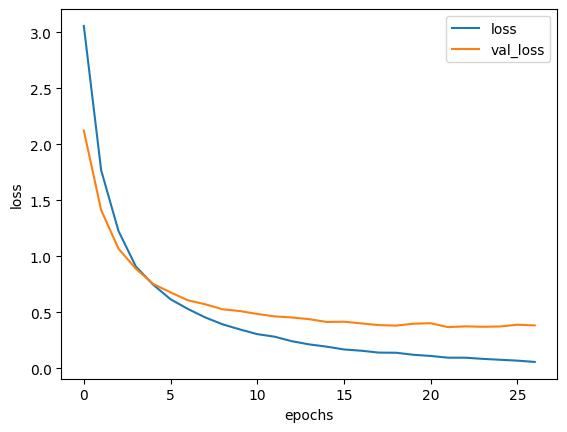

In [ ]:
# plt.plot(history.history["loss"])
# plt.plot(history.history["val_loss"])
# plt.legend(["loss", "val_loss"])
# plt.xlabel("epochs")
# plt.ylabel("loss")
# plt.show()

In [ ]:
# # save both the weights and the architecture 
# model.save("PersianCNN_threshold.h5")

## **Loading trained model**

In [ ]:
# load the saved model
from keras.models import load_model
persian_model = load_model("/content/drive/MyDrive/Colab Notebooks/ComputerVision/Digit_Classification/Persian/PersianCNN_threshold.h5")

In [ ]:
persian_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 100, 100, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 96, 96, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 16)       0         
 2D)                                                             
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 11, 11, 16)       0

In [ ]:
# Score: loss and accuracy
score = persian_model.evaluate(testimage, testlabel)
print("Model Error= %.2f%%" %(100*(1-score[1])))

2/2 [==============================] - 1s 118ms/step - loss: 0.1562 - accuracy: 0.9655
Model Error= 3.45%


In [ ]:
# Predicting test set
n=54
encoded_prediction = persian_model.predict(testimage)
prediction = fitencoder.inverse_transform(encoded_prediction)
pred = prediction[n][0]
print("Prediction: ",pred)
print("Ground_Trust: ",test_label[n])

2/2 [==============================] - 0s 88ms/step
Prediction:  ayin
Ground_Trust:  ayin
